# Quantum tomography GHZ-checker

Check for the hidden state is GHZ state or not?

<img src='others/binho_checkstate.png' width = 500px/>

It looks like W state case:

<img src='others/check_ghz_state.png'/>

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

In [2]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
thetas = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*15)
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_GHZchecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)


Step: 100%|██████████| 150/150 [17:24<00:00,  6.96s/it]


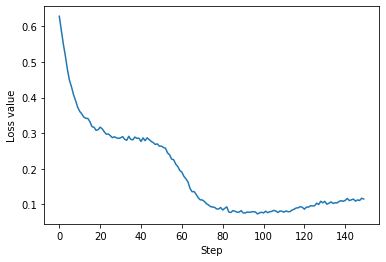

In [3]:
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [5]:
# Get |psi> = U_gen|000...>
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_arbitrary_nqubit(qc, thetas, num_layers = num_layers)
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
# Get |psi~> = U_target|000...>
qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc1 = qtm.qtm_nqubit.create_ghz_state(qc1, theta = theta)
psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.3358125103002567
Fidelity:  (0.887229958478583+1.2738004141060744e-10j)


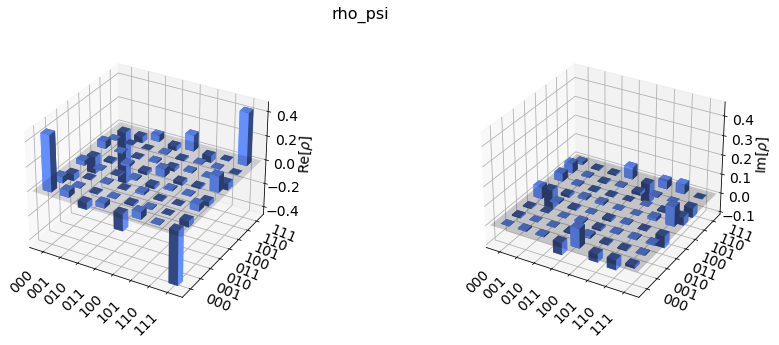

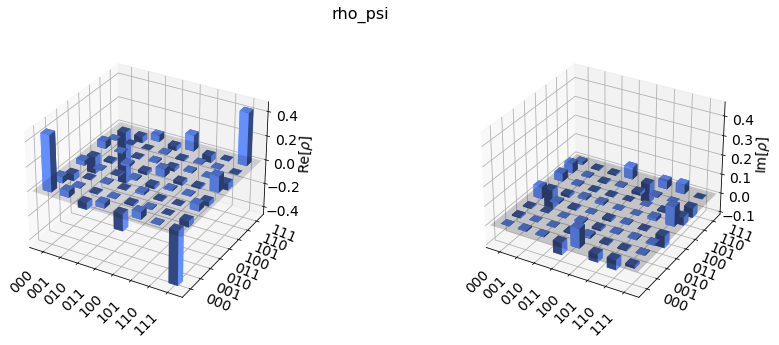

In [6]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

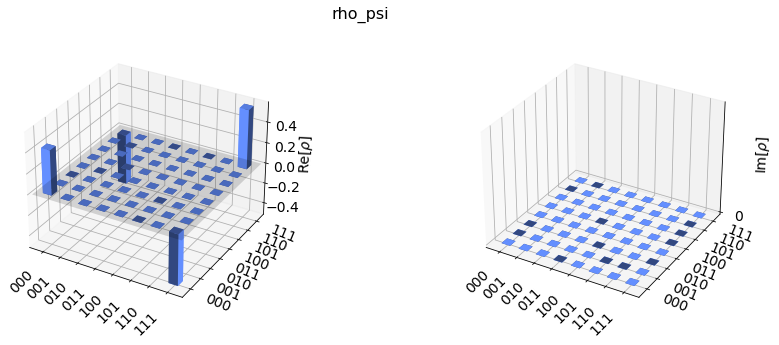

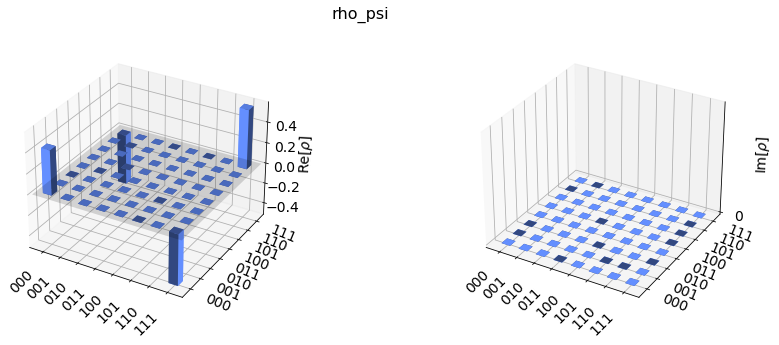

In [7]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi')